<a href="https://colab.research.google.com/github/GitRanyel/UnimedDadosDIO/blob/main/PlanilhasExcelPandasDIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Pandas e Matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Trabalhando com planilhas


In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#Juntando arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Amostras aleatórias
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
15,Salvador,2019-01-01,20.15,1036,3,60.45
53,Aracaju,2018-01-01,8.64,1522,2,17.28
126,Fortaleza,2019-03-02,41.87,980,8,334.96
38,Aracaju,2018-01-01,142.46,1520,1,142.46
127,Recife,2019-03-02,39.56,982,8,316.48


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Alterando tipo do dado
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
# Total de linhas com valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].mean()

122.61180089485458

In [ ]:
#Criar colunas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
#Retornando maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando menor receita
df["Receita"].min()

3.34

In [ ]:
# 3 maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
# 3 piores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
df.groupby("Cidade")["Receita"].mean()

Cidade
Aracaju      374.986538
Fortaleza    266.999789
Natal        696.781333
Recife       365.750070
Salvador     169.153042
Name: Receita, dtype: float64

In [ ]:
#Ordernando o conjunto dos dados baseado na coluna "Receita" / Ascending = do maior para ao menor
df.sort_values("Receita" , ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [ ]:
# Convertendo coluna para tipo inteiro      
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
#Convertendo coluna para tipo data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
# Agrupando pelo ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
# Extrair o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
38,Natal,2018-02-25,828.00,852,4,3312.00,4.0,2018,2,25,55 days
66,Recife,2019-01-01,14.59,983,7,102.13,7.0,2019,1,1,365 days
82,Recife,2019-01-01,29.55,981,6,177.30,6.0,2019,1,1,365 days
94,Salvador,2019-01-01,33.24,1037,1,33.24,1.0,2019,1,1,365 days
205,Natal,2019-01-02,196.09,1037,1,196.09,1.0,2019,1,2,366 days
233,Natal,2019-01-03,172.40,1036,2,344.80,2.0,2019,1,3,367 days
1,Recife,2019-01-01,11.44,983,1,11.44,1.0,2019,1,1,365 days
55,Aracaju,2018-01-01,67.23,1520,8,537.84,8.0,2018,1,1,0 days
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,2019,1,1,365 days
143,Salvador,2019-01-02,41.18,1037,2,82.36,2.0,2019,1,2,366 days


In [ ]:
# Criando tabela de Trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
print(vendas_marco_19)

        Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas  \
108  Fortaleza 2019-03-02  152.89    981     4   611.56             4.0   
109  Fortaleza 2019-03-02   18.90    982     6   113.40             6.0   
110  Fortaleza 2019-03-02   51.98    983     6   311.88             6.0   
111  Fortaleza 2019-03-02    8.00    981     3    24.00             3.0   
112  Fortaleza 2019-03-02  133.59    982     1   133.59             1.0   
..         ...        ...     ...    ...   ...      ...             ...   
137   Salvador 2019-03-02   51.66   1036     3   154.98             3.0   
138   Salvador 2019-03-02  212.03   1037     3   636.09             3.0   
139   Salvador 2019-03-02  169.01   1036     1   169.01             1.0   
140   Salvador 2019-03-02   20.79   1036     2    41.58             2.0   
141   Salvador 2019-03-02    9.08   1036     1     9.08             1.0   

     Ano_Venda  mes_venda  dia_venda diferenca_dias  trimestre_venda  
108       2019          3   

# Criando gráficos

In [ ]:
# Mudando o estilo dos dashboards
plt.style.use("classic")

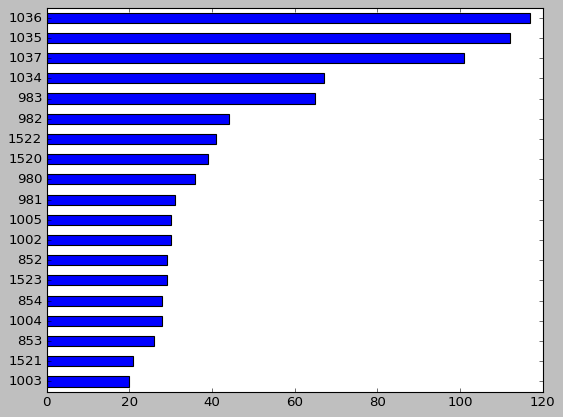

In [ ]:
# Gráfico de barras relacionados a vendas por loja em formato horizontal (barh)
df["LojaID"].value_counts(ascending=True).plot.barh(color = "blue");

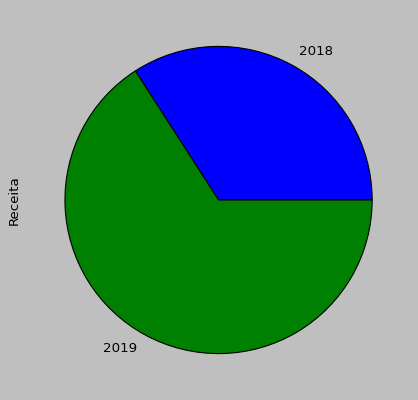

In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

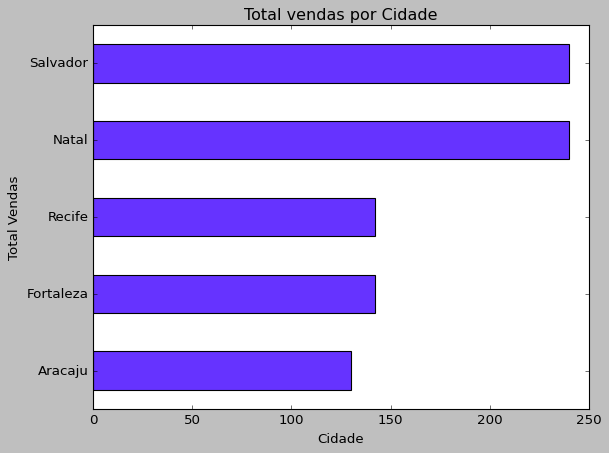

In [ ]:
# Gerando gráfico na horizontal de visualização decrescente
df["Cidade"].value_counts(ascending=True).plot.barh(title="Total vendas por Cidade", color="#6633FF")
plt.xlabel("Cidade") #Nomeia X para Cidade
plt.ylabel("Total Vendas"); #Nomeia Y para Total vendas

In [ ]:
# Selecionando apenas vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

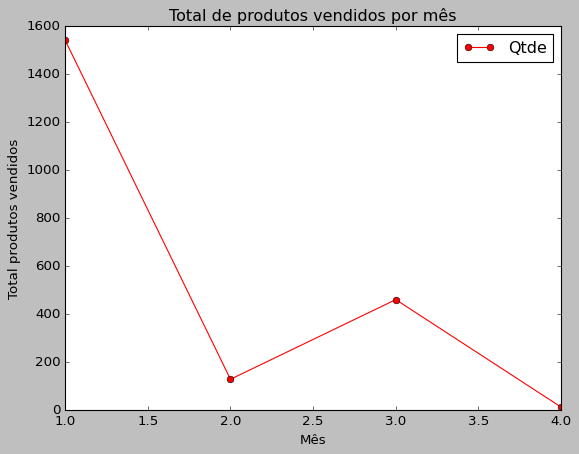

In [ ]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", color="red")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.title("Total de produtos vendidos por mês");

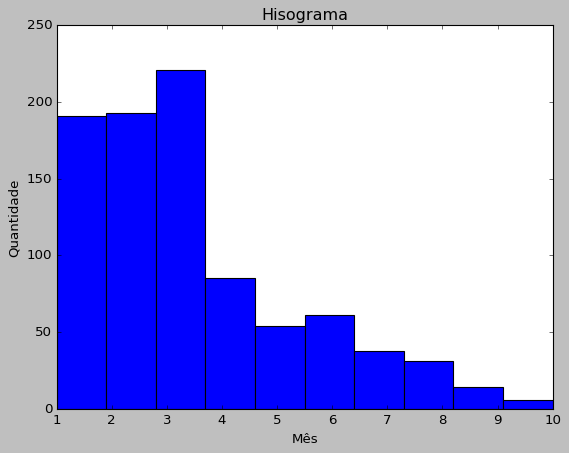

In [ ]:
#Hisograma
plt.hist(df["Qtde"])
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.title("Hisograma");

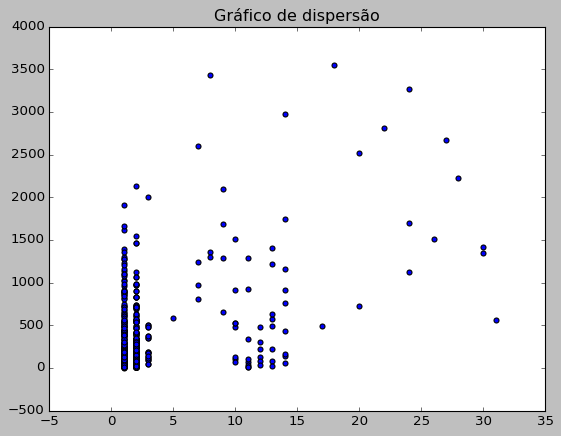

In [ ]:
plt.scatter(x = df_2019["dia_venda"], y = df_2019["Receita"])
plt.title("Gráfico de dispersão");

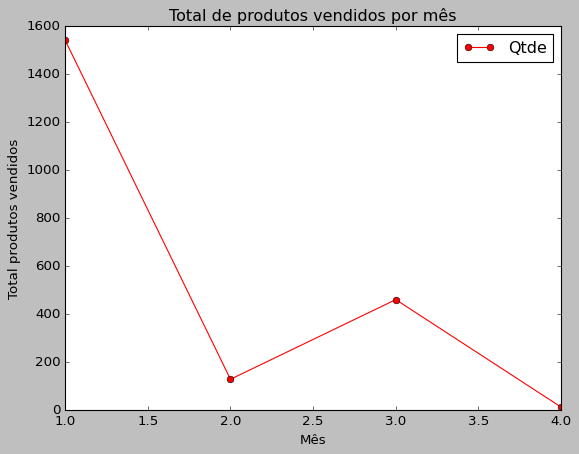

In [ ]:
# Salvar gráfico em jpeg
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", color="red")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.title("Total de produtos vendidos por mês");
plt.savefig("Grafico QTDE x Mes.jpeg")